In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
autoencoder = Sequential()
# Encoding
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu',padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# Decoding
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [9]:
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 8, 8, 8)          

In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 40s 85ms/step - loss: 0.2056 - val_loss: 0.1334
Epoch 2/50
469/469 [==============================] - 37s 80ms/step - loss: 0.1230 - val_loss: 0.1144
Epoch 3/50
469/469 [==============================] - 37s 79ms/step - loss: 0.1120 - val_loss: 0.1079
Epoch 4/50
469/469 [==============================] - 37s 80ms/step - loss: 0.1067 - val_loss: 0.1034
Epoch 5/50
469/469 [==============================] - 38s 81ms/step - loss: 0.1029 - val_loss: 0.1001
Epoch 6/50
469/469 [==============================] - 39s 83ms/step - loss: 0.1001 - val_loss: 0.0976
Epoch 7/50
469/469 [==============================] - 38s 82ms/step - loss: 0.0978 - val_loss: 0.0956
Epoch 8/50
469/469 [==============================] - 39s 82ms/step - loss: 0.0961 - val_loss: 0.0941
Epoch 9/50
469/469 [==============================] - 42s 90ms/step - loss: 0.0948 - val_loss: 0.0931
Epoch 10/50
469/469 [==============================] - 38s 80ms/step - loss: 0.093

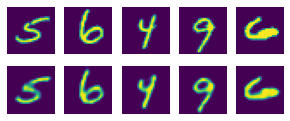

In [16]:
random_test = np.random.randint(X_test.shape[0], size=5)  #테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))  #출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열합니다.
    ax = plt.subplot(2, 7, i + 1) 
    plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i +1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
    ax.axis('off')
plt.show()